# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [28]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


In [29]:
# Set the API base URL
#url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

In [30]:
#requests.get(url+"&q=California").json()

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [31]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
#"http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =  city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
 
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | hawaiian paradise park
Processing Record 5 of Set 1 | tobi village
City not found. Skipping...
Processing Record 6 of Set 1 | hasaki
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | cabedelo
Processing Record 11 of Set 1 | praia da vitoria
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | siverek
Processing Record 15 of Set 1 | pariaman
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | zemio
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | karkira
Processing R

In [32]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [33]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,7.40,95,93,14.13,TF,1710002220
1,thompson,55.7435,-97.8558,-12.91,72,20,1.03,CA,1710002747
2,college,64.8569,-147.8028,-14.82,78,100,0.00,US,1710002747
3,hawaiian paradise park,19.5933,-154.9731,19.46,97,100,3.60,US,1710002233
4,hasaki,35.7333,140.8333,1.22,49,1,8.13,JP,1710002748


In [34]:
#import os
#current_working_directory = os.getcws()
#print(current_working_directory)

In [35]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\laris\Documents\python-api-challenge\python-api-challenge\WeatherPy\output_data\cities.csv", index_label="City_ID")

In [36]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\laris\Documents\python-api-challenge\python-api-challenge\WeatherPy\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,7.40,95,93,14.13,TF,1710002220
1,thompson,55.7435,-97.8558,-12.91,72,20,1.03,CA,1710002747
2,college,64.8569,-147.8028,-14.82,78,100,0.00,US,1710002747
3,hawaiian paradise park,19.5933,-154.9731,19.46,97,100,3.60,US,1710002233
4,hasaki,35.7333,140.8333,1.22,49,1,8.13,JP,1710002748


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

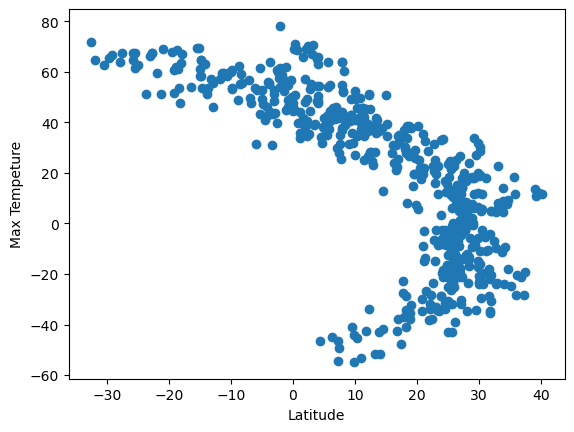

In [42]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Tempeture")

# Save the figure
plt.savefig(r"C:\Users\laris\Documents\python-api-challenge\python-api-challenge\WeatherPy\output_data\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

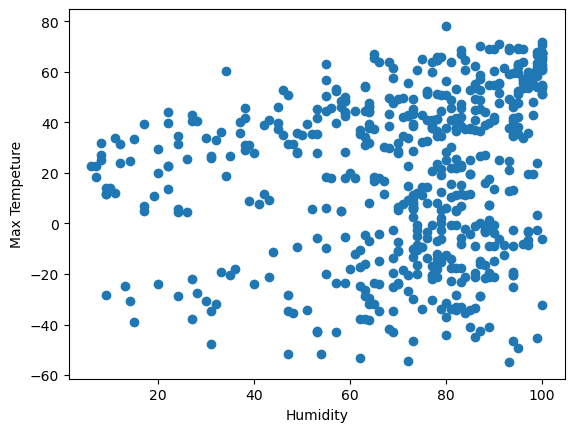

In [43]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Humidity")
plt.ylabel("Max Tempeture")

# Save the figure
plt.savefig(r"C:\Users\laris\Documents\python-api-challenge\python-api-challenge\WeatherPy\output_data\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

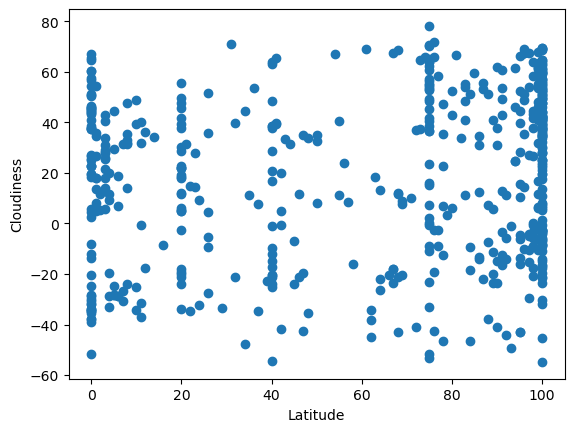

In [44]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig(r"C:\Users\laris\Documents\python-api-challenge\python-api-challenge\WeatherPy\output_data\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

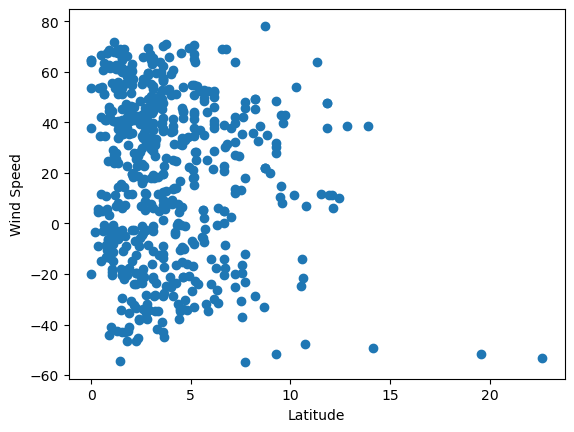

In [45]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Save the figure
plt.savefig(r"C:\Users\laris\Documents\python-api-challenge\python-api-challenge\WeatherPy\output_data\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,thompson,55.7435,-97.8558,-12.91,72,20,1.03,CA,1710002747
2,college,64.8569,-147.8028,-14.82,78,100,0.00,US,1710002747
3,hawaiian paradise park,19.5933,-154.9731,19.46,97,100,3.60,US,1710002233
4,hasaki,35.7333,140.8333,1.22,49,1,8.13,JP,1710002748
5,yellowknife,62.4560,-114.3525,-8.71,86,75,3.60,CA,1710002102


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,7.40,95,93,14.13,TF,1710002220
6,ushuaia,-54.8000,-68.3000,9.81,93,100,7.72,AR,1710002748
7,puerto natales,-51.7236,-72.4875,13.25,54,75,9.26,CL,1710002221
8,cabedelo,-6.9811,-34.8339,32.37,64,45,5.06,BR,1710002704
10,puerto ayora,-0.7393,-90.3518,28.98,77,42,0.63,EC,1710002748


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8615941269177168


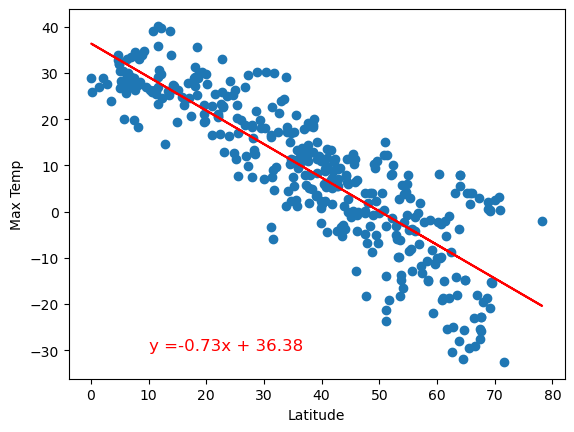

In [51]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

The r-value is: 0.5701349480867306


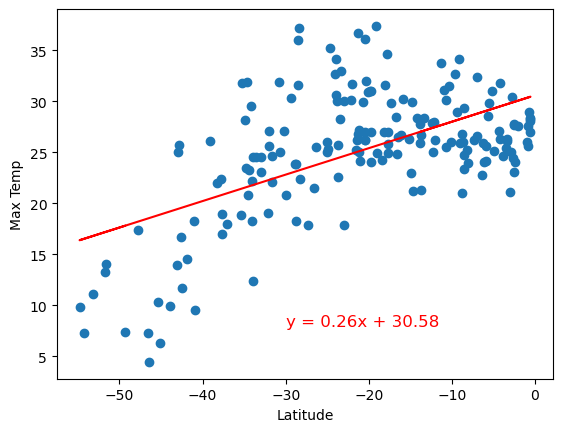

In [60]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))

There is a fairly strong negative correlation between latitude and temperature with a correlation coefficient of -0.8615941269177168 on Northern Hemisphere.
There is a relatively strong positive correlation between latitude and temperature with a correlation coefficient of 0.5701349480867306 on Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.37783865925986027


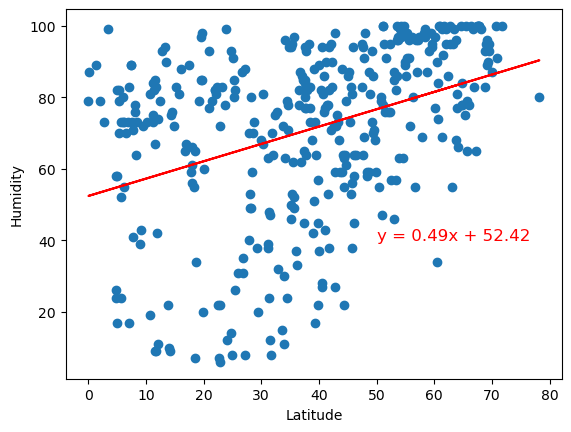

In [54]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))

The r-value is: 0.27498786009358156


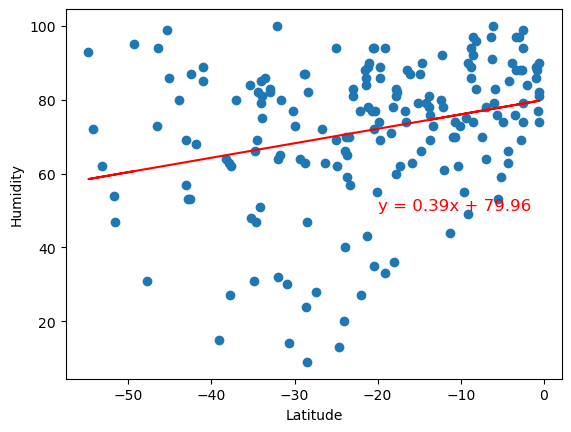

In [55]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))

There is a moderate positive correlation between latitude and humidity with a correlation coefficient of 0.37783865925986027 on Northern Hemisphere.
There is a moderate positive correlation between latitude and humidity with a correlation coefficient of 0.27498786009358156 on Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.25775230998768384


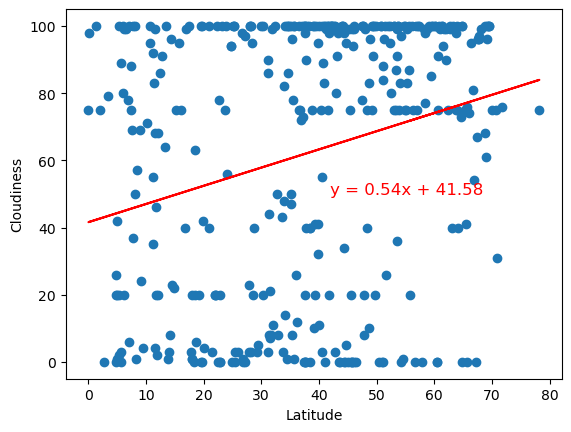

In [56]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))

The r-value is: 0.3554299347904334


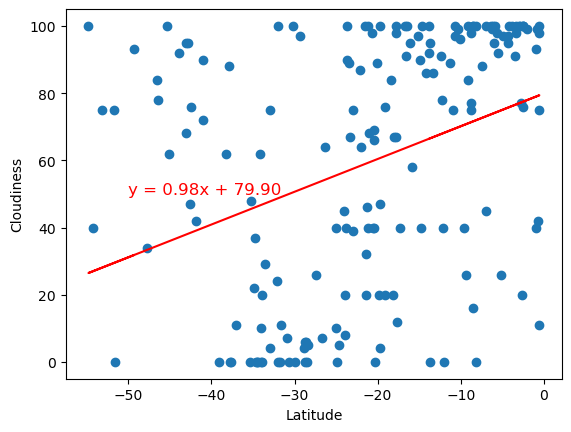

In [57]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))

There is a moderate positive correlation between latitude and cloudiness with a correlation coefficient of 0.25775230998768384 on Northern Hemisphere.
There is a moderate positive correlation between latitude and cloudiness with a correlation coefficient of 0.3554299347904334 on Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.19205024694285402


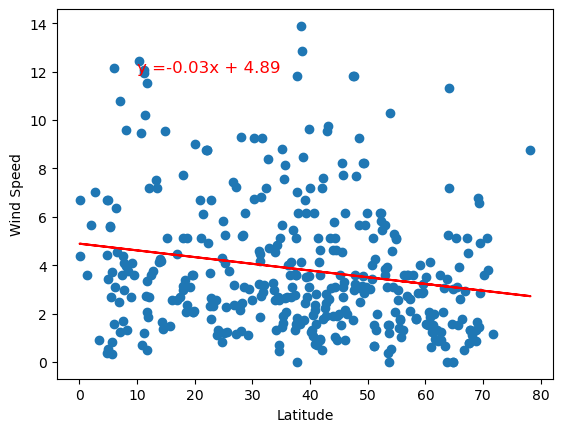

In [58]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

The r-value is: -0.31296190546573577


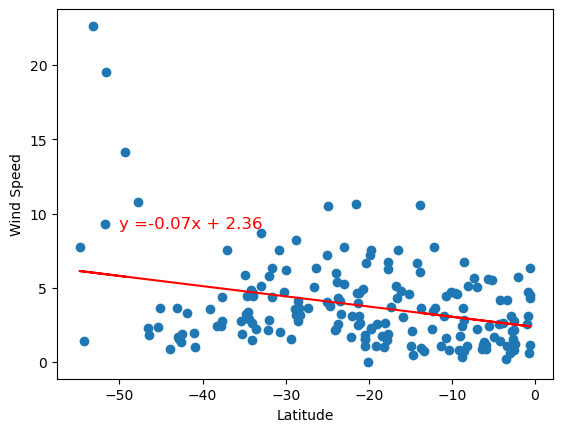

In [59]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))

There is almost no correlation between latitude and wind speed with a correlation coefficient of -0.19205024694285402 on Northern Hemisphere.
There is a moderate negative correlation between latitude and wind speed with a correlation coefficient of -0.31296190546573577 on Southern Hemisphere.